<a href="https://colab.research.google.com/github/Ken-Lau-Lab/single-cell-lectures/blob/main/section03_data_process_dim_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Section 3:__ Data Processing, Dimension Reduction and Visualization

## load packages and github repo

In [ ]:
!git clone https://github.com/Ken-Lau-Lab/single-cell-lectures  # for Colab users

In [ ]:
!pip install scanpy

In [ ]:
!pip install matplotlib==3.7.1

In [3]:
import scanpy as sc; sc.set_figure_params(dpi=200)
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

### read in data

In [ ]:
data = sc.read('single-cell-lectures/data/Example_Data_L3.h5ad')

## Data Processing

In [1]:
def normalization( dat_ct):
    """this function normalize the data so that each cell has the same 
    number of total counts as the median value of the total counts among all cells.
    The data will also be log-like transformed
    Count values will also be transformed to z-scores for each gene"""
    sc.pp.normalize_total(dat_ct) 
    dat_ct.X = np.arcsinh(dat_ct.X).copy()
    sc.pp.scale(dat_ct)
    
    return dat_ct

In [52]:
dat.raw = dat.copy() # save a raw layer

In [53]:
normalization( dat)

AnnData object with n_obs × n_vars = 461 × 13583
    var: 'n_cells', 'mean', 'std'

## Dimension Reduction

In [2]:
n_neighbors = int( np.sqrt(dat.n_obs) ) # an optimal number for k in KNN

NameError: name 'np' is not defined

In [ ]:
sc.tl.pca(dat, return_info=False, use_highly_variable = False ) #PCA

In [ ]:
sc.pp.neighbors( dat, n_neighbors= n_neighbors , n_pcs=50, ) # make neighborhood graph

In [ ]:
sc.tl.umap(dat) # make UMAP

In [ ]:
sc.tl.leiden( dat, resolution = 0.7)

## Visualization

In [64]:
ne_markers = ['CD8A',  'CD4', 'JCHAIN', 'COL1A1'] # Non-epithelial cell markers

In [68]:
markers = ['GUCA2A',  'OLFM4', 'MKI67',  'MUC2', 'CHGA', 'LYZ1'] # epithelial cell type markers

[WARNING] /home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(



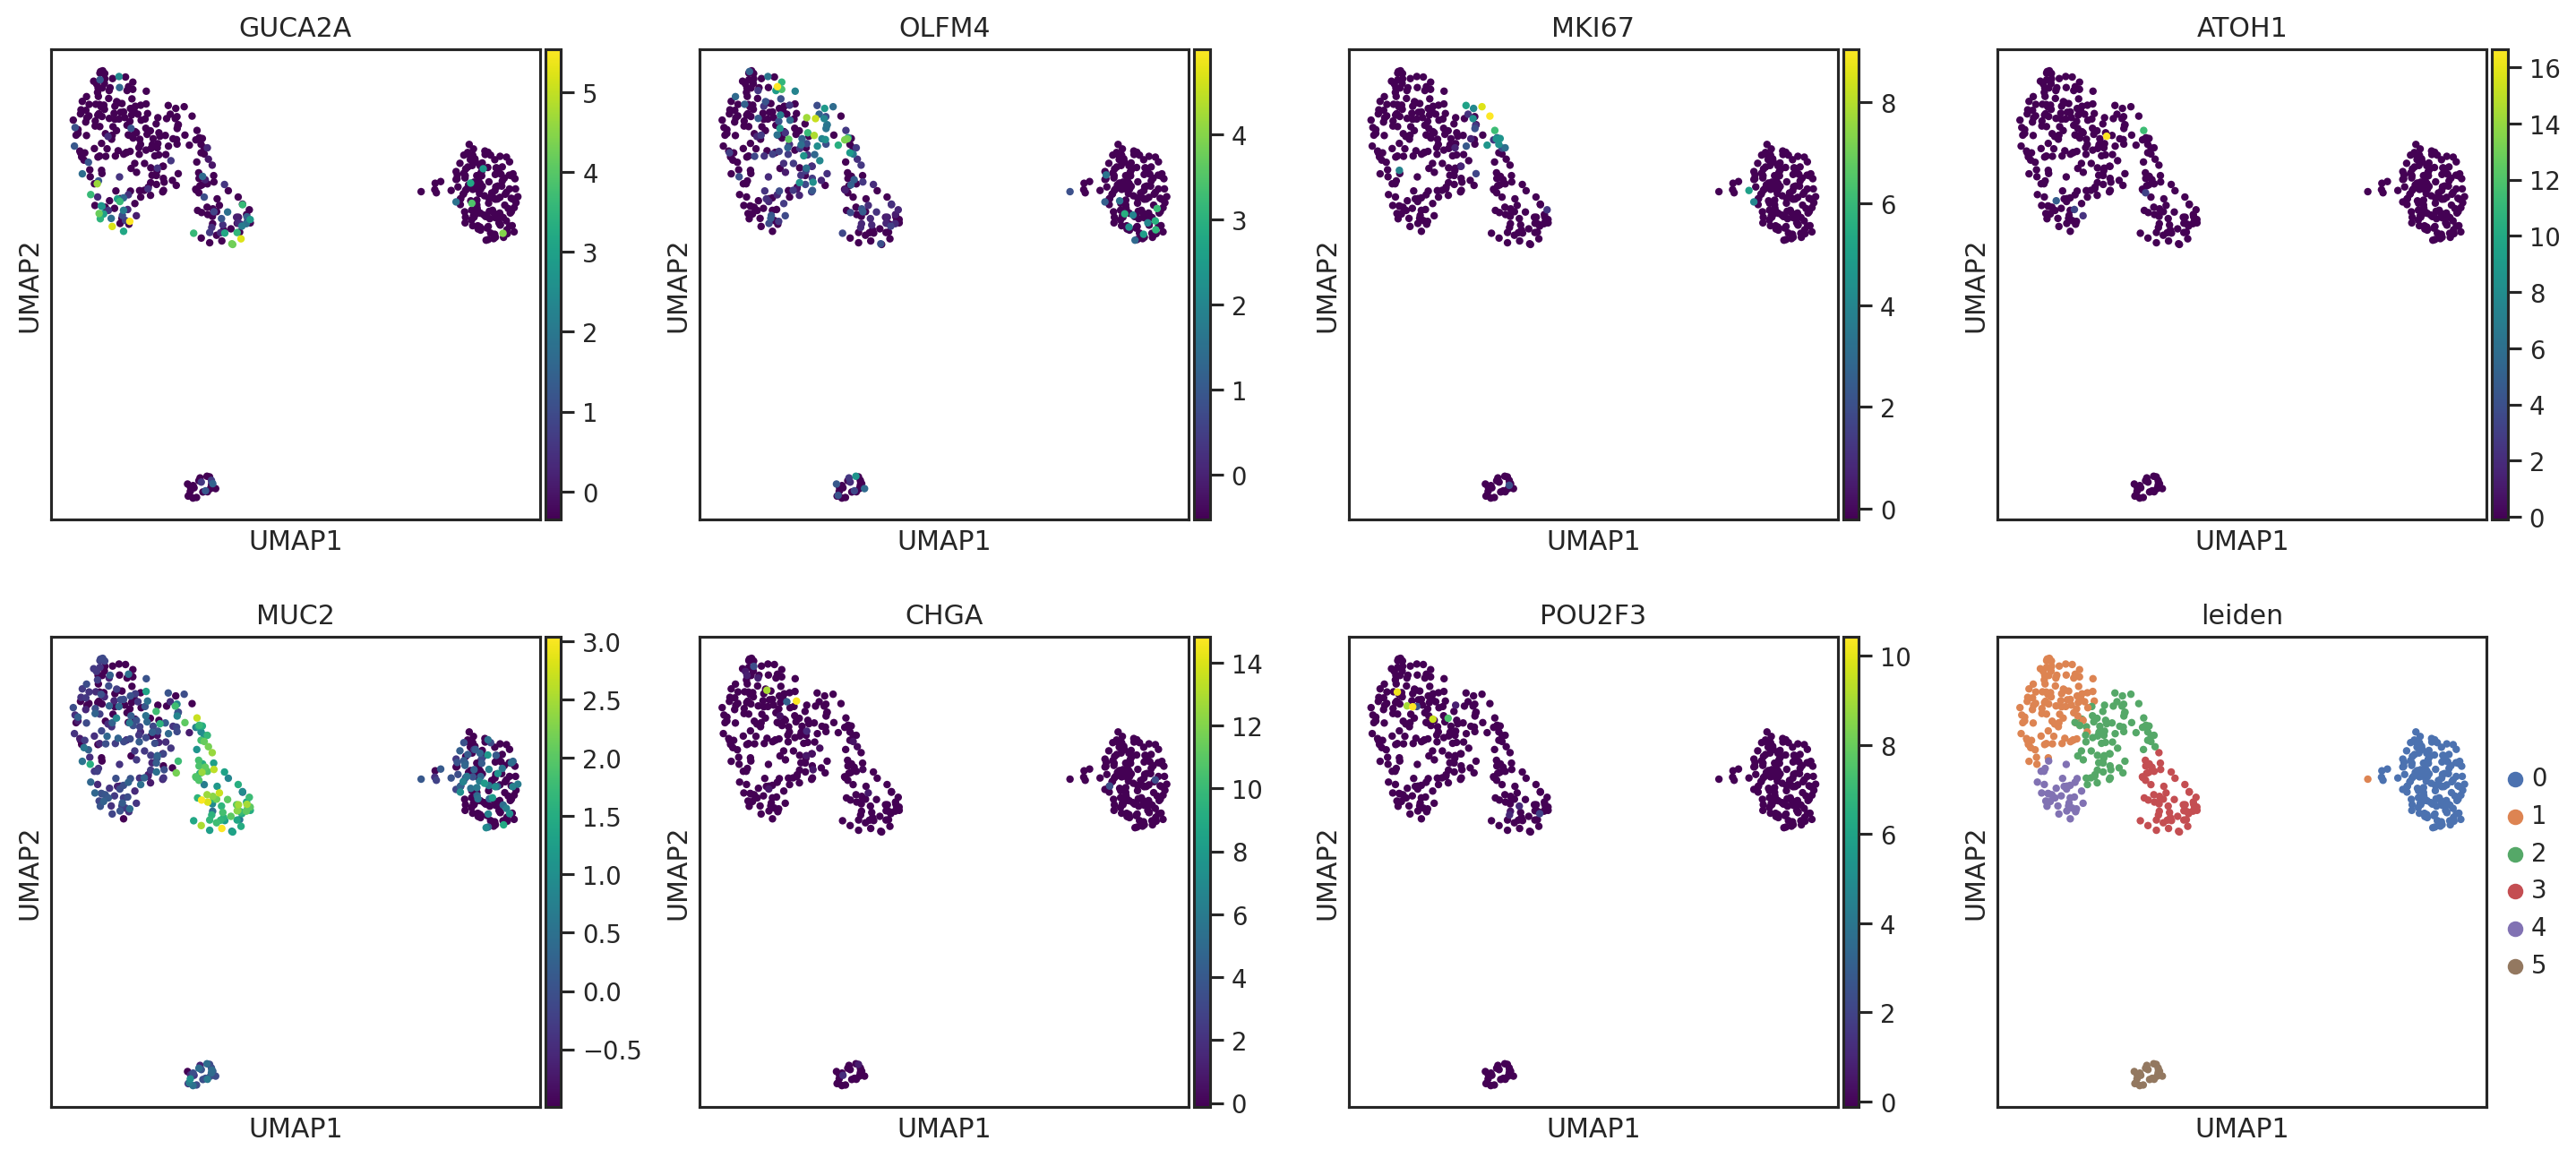

In [76]:
sc.pl.umap( dat, color = markers, use_raw = False, s = 45, cmap = 'viridis')

[WARNING] /home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(



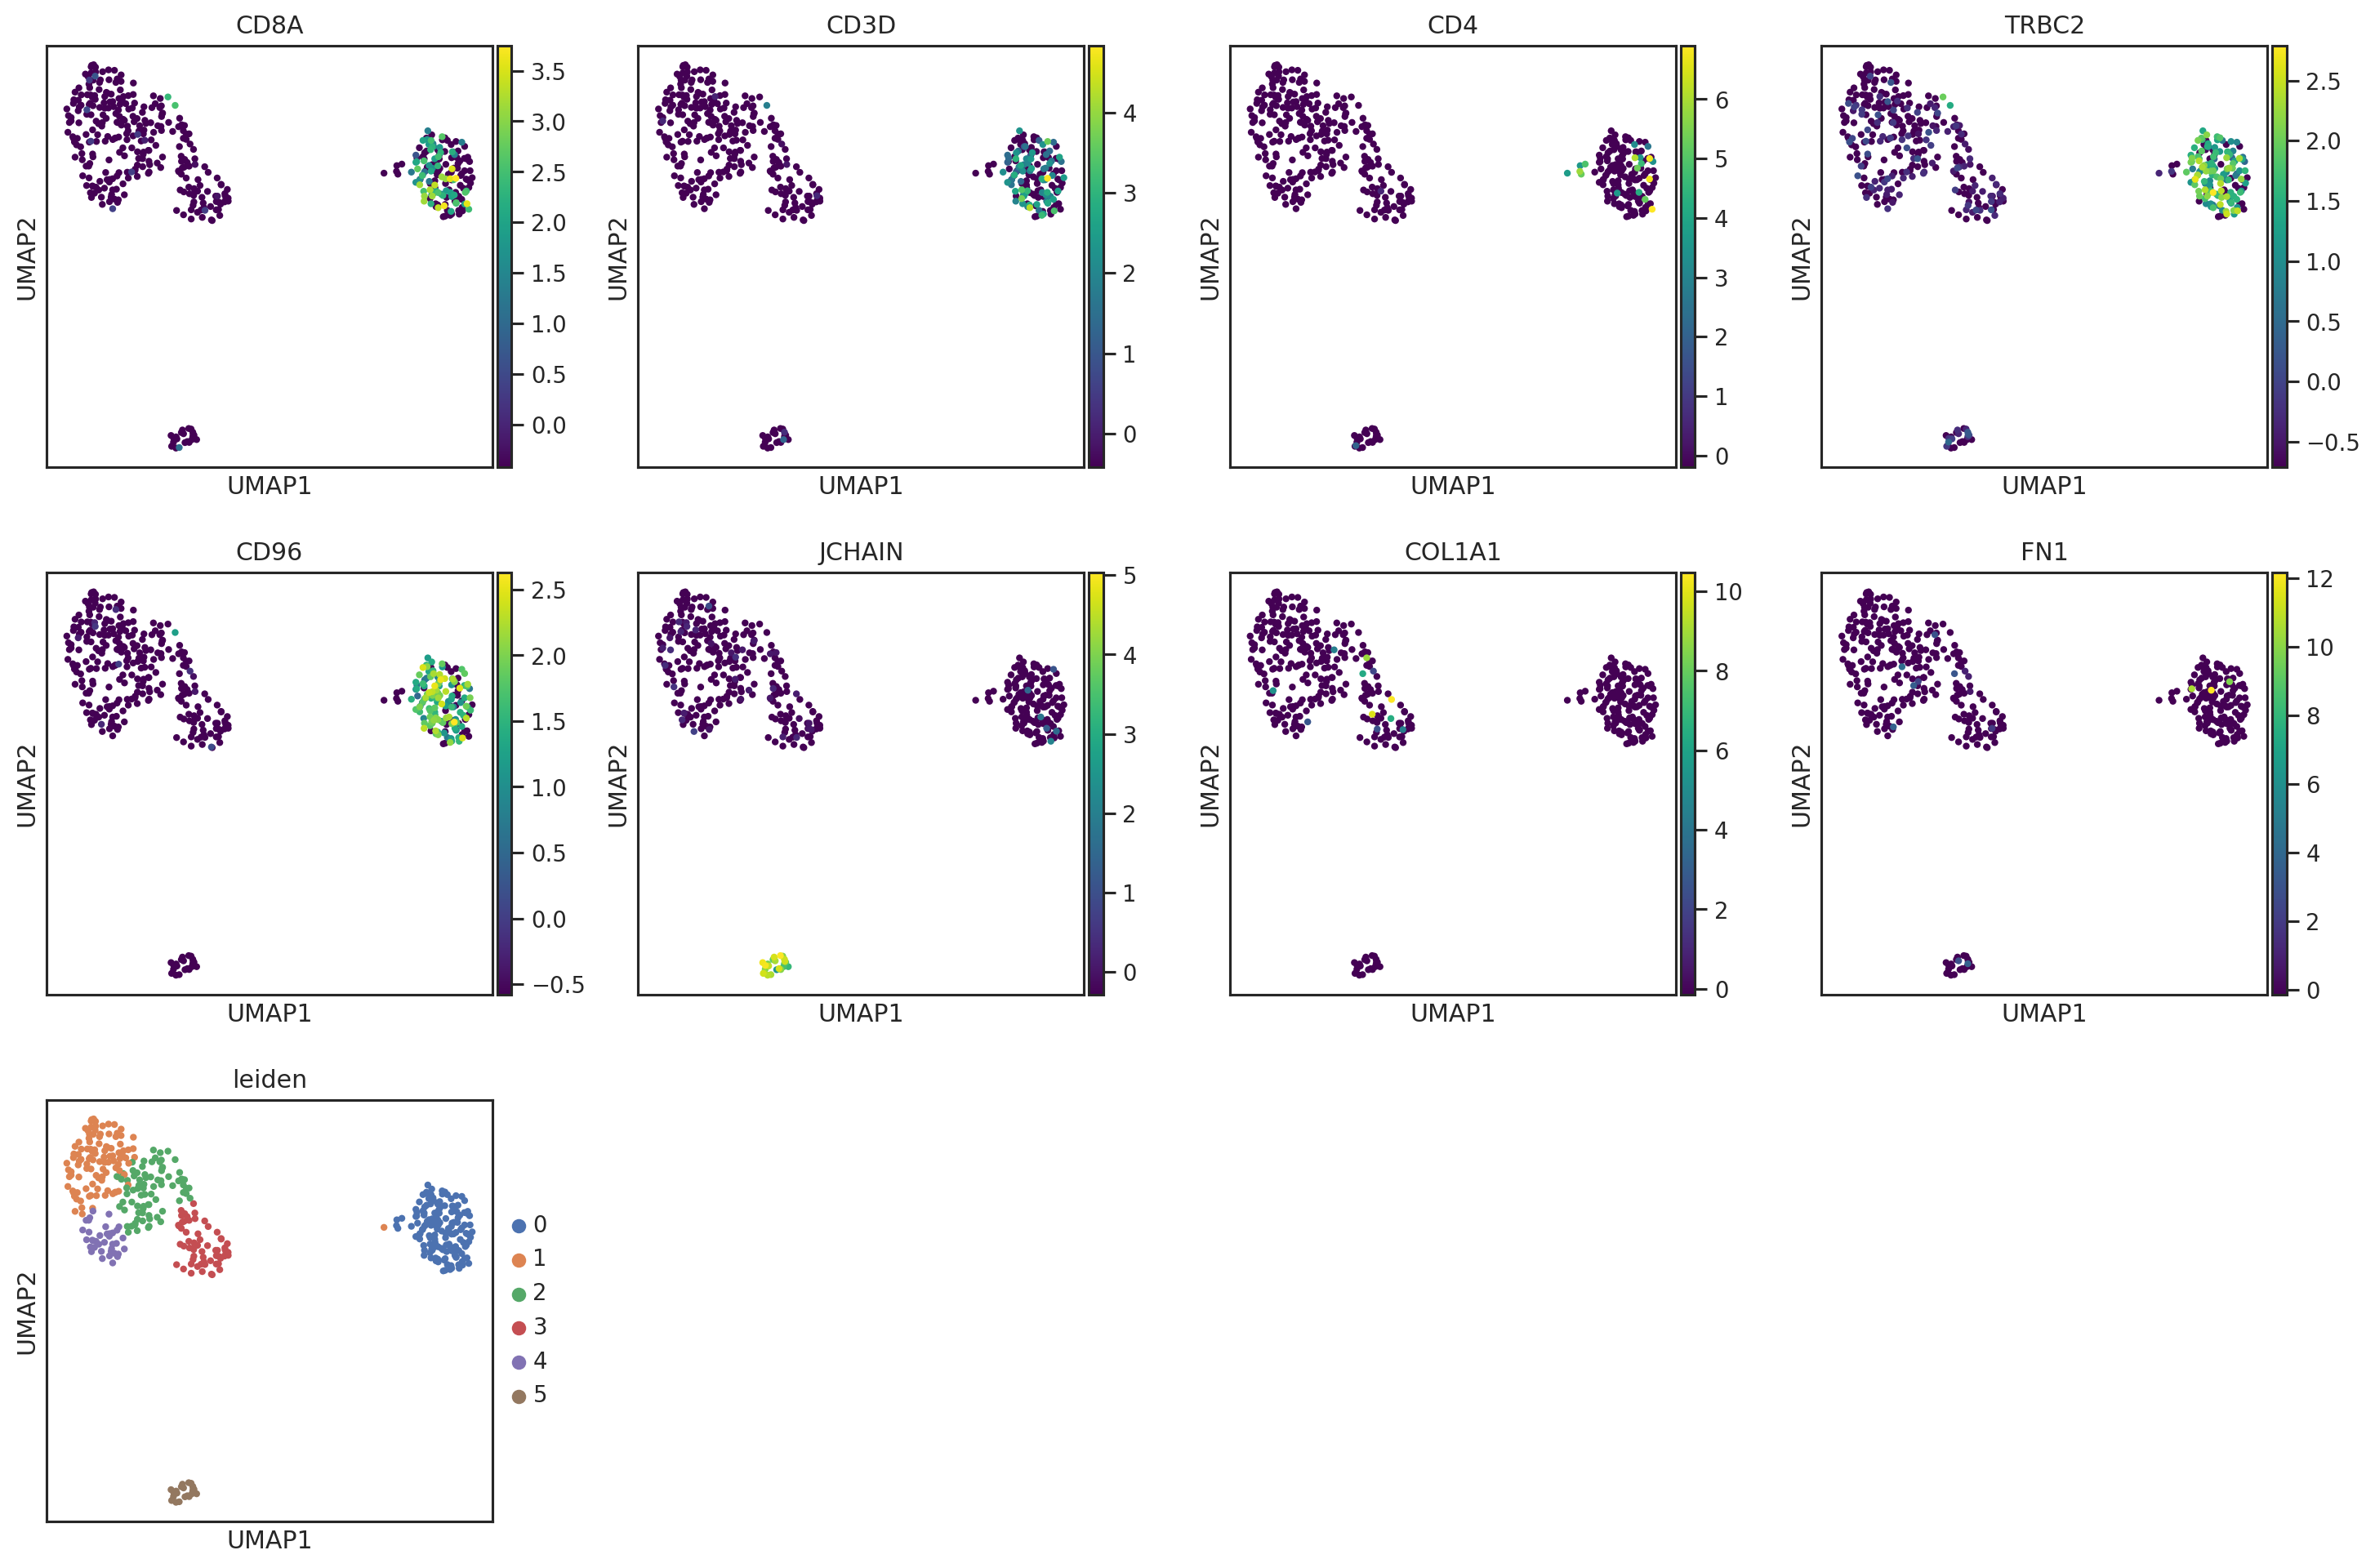

In [77]:
sc.pl.umap( dat, color = ne_markers , use_raw = False, s = 45, cmap = 'viridis' )

In [ ]:
sc.pl.umap(dat, color = 'leiden' )